## Центральная предельная теорема
#### Я выбрал Экспоненциальное распределение, которое присутствует в scipy.stats.

Ссылка на страницу с распределением в википедии https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [3]:
#импорт библиотек
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import expon

%matplotlib inline

### Генерация выборки объёма 1000

In [11]:
# сгенерируем 1000 значений
exponent_distribution = expon.rvs(scale = 1.2,size=1000)

#Среднее значение и дисперсия 
m_exp, v_exp = expon.stats(scale = 1.2)
print ('Среднее значение: ', m_exp)
print ('Дисперсия: ', v_exp)


Среднее значение:  1.2
Дисперсия:  1.44


### Графики гистограммы выборки и теоритеческой плотности распределения.

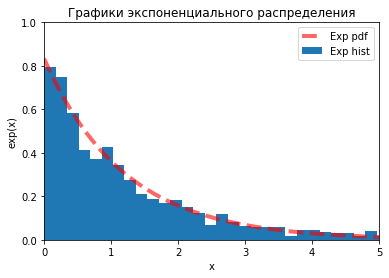

In [12]:
#график гистограммы выборки
plt.hist(exponent_distribution, bins=60, density=True, label='Exp hist')

#теоретическая плотность распределения
x = np.linspace(0,7, 1000)
plt.plot(x,expon.pdf(x,scale = 1.2),'r--', lw=4, alpha=0.6, label='Exp pdf');

#украшение графика
plt.title('Графики экспоненциального распределения')
plt.legend()
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.axis([0, 5, 0, 1]);

### Генерация 1000 выборой объёма n (5, 10, 50)

In [86]:
#количество выборок
expon_ammount = 1000

#типы выборок
expon_type = [5, 10, 50]

#список для 3 параметров(5,10,50) для 1000 выборок(их средних)
expon_info_array =list()

for i in range( len(expon_type) ):
    for j in range(expon_ammount):
        expon_info_array.append(np.array(sts.expon.rvs(size=expon_type[i],scale = 1.2)).mean())
        
#матрица для 3 параметров(5,10,50)(строки) для 1000(столбцы) выборок (их средних)      
expon_info_array = np.array(expon_info_array).reshape(3,1000)
print (expon_info_array)

[[1.64524801 0.80387359 1.83057485 ... 1.81261944 1.82810511 1.81606744]
 [1.03837657 1.40174757 1.84197013 ... 1.18270844 1.44594068 1.37836663]
 [1.45349821 1.28372332 1.26993554 ... 0.93831929 1.30576966 1.12639891]]


### Вычисление параметров нормальных распределений

In [88]:
#Математическое ожидание и дисперсия
#Mean(‘m’), variance(‘v’)
exp_mean, exp_variance = expon.stats(loc=0, scale=1.2, moments='mv')

#массив для 3 дисперсий
exp_params = np.zeros(3)

print ('Математическое ожидание: ' + str(exp_mean))
print ('Дисперсия: ' + str(exp_variance))

#Дисперсия для для выборок объема(5,10,50)
for i in range( len(expon_type) ):
    exp_sigma = np.sqrt(1/expon_type[i])
    exp_params[i] = exp_sigma
    print ('Дисперсия для n = ' + str(expon_type[i]) + ': ' + str(exp_sigma))

Математическое ожидание: 1.2
Дисперсия: 1.44
Дисперсия для n = 5: 0.4472135954999579
Дисперсия для n = 10: 0.31622776601683794
Дисперсия для n = 50: 0.1414213562373095


### Нарисовать плотность соответствующего нормального распределения поверх каждой гистограммы

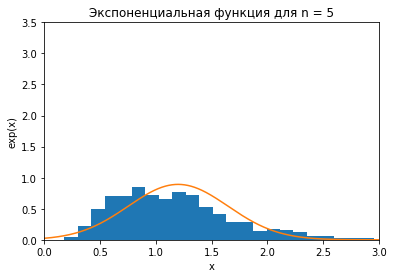

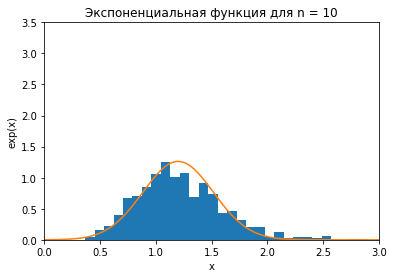

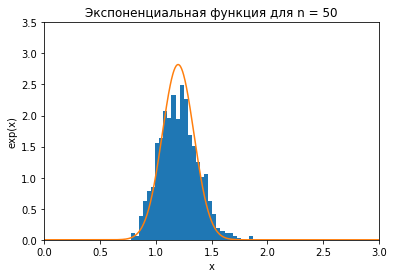

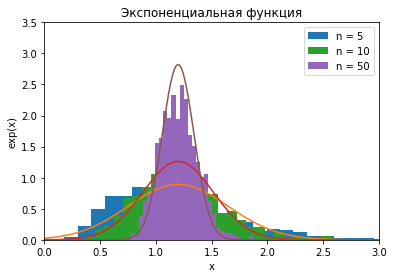

In [100]:
#гистограммы выборки
for i in range( len(expon_type) ):
    plt.hist(expon_info_array[i], bins=30, density=True)
    plt.axis([0, 3, 0, 3.5])
    plt.title('Экспоненциальная функция для n = ' + str(expon_type[i]))
    plt.xlabel('x')
    plt.ylabel('exp(x)')
    
#нормальная распределенная случайная величина для выборки
    normRv = sts.norm(loc=exp_mean, scale=exp_params[i])    
    x = np.linspace(0,3,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
#гистограммы выборки    
for i in range( len(expon_type) ):
    plt.hist(expon_info_array[i], bins=30, density=True, label='n = ' + str(expon_type[i]))
    plt.axis([0, 3, 0, 3.5])
    plt.title('Экспоненциальная функция')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('exp(x)')
    
#нормальная распределенная случайная величина для выборки
    normRv = sts.norm(loc=exp_mean, scale=exp_params[i])    
    x = np.linspace(0,3,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

### Выводы по результатам задания
##### Распределение выборочных средних достаточно хорошо описывается нормальным распределением.

С ростом объема выборки рапределения выборочных средних к нормальному распределению увеличивается.

Также распределение выборочных средних становится более гладким и сужается